In [1]:
import pandas as pd
import numpy as np

# Load data
xls = pd.ExcelFile("E:\\数学建模国赛\\2022数学建模赛题\\C题\\附件.xlsx")


# Load all sheets in the Excel file
sheets = xls.sheet_names
dfs = {}
for sheet in sheets:
    dfs[sheet] = pd.read_excel(xls, sheet)
df1=dfs['表单1'].drop(columns=["文物编号"])

# 创建一个DataFrame来保存每个特征的计数信息
count_info = pd.DataFrame(columns=['特征', '期望计数小于5的单元格数', 
                                   '最小期望计数', '期望计数小于5的单元格数的比例'])

# 对每个特征进行卡方检验
for column in ['类型', '纹饰', '颜色']:
    # 删除含有空值的行
    df_dropped_na = df1[['表面风化', column]].dropna()
    
    # 创建列联表
    contingency_table = pd.crosstab(df_dropped_na['表面风化'], df_dropped_na[column])
    
    # 计算期望计数
    row_totals = contingency_table.sum(axis=1)
    col_totals = contingency_table.sum(axis=0)
    total = contingency_table.sum().sum()
    expected = np.outer(row_totals, col_totals) / total
    
    # 计算期望计数小于5的单元格数
    cells_with_expected_count_less_than_5 = (expected < 5).sum()
    
    # 获取最小期望计数
    min_expected_count = expected.min()
    
    # 计算期望计数小于5的单元格数的比例
    ratio_cells_with_expected_count_less_than_5 = cells_with_expected_count_less_than_5 / (contingency_table.shape[0] * contingency_table.shape[1])
    
    # 将结果保存到DataFrame
    count_info_to_append = pd.DataFrame({
        '特征': [column],
        '期望计数小于5的单元格数': [cells_with_expected_count_less_than_5],
        '最小期望计数': [min_expected_count],
        '期望计数小于5的单元格数的比例': [ratio_cells_with_expected_count_less_than_5]
    })
    
    count_info = pd.concat([count_info, count_info_to_append], ignore_index=True)

# 显示计数信息
count_info


,特征,期望计数小于5的单元格数,最小期望计数,期望计数小于5的单元格数的比例
0,类型,0,7.448276,0.000000
1,纹饰,2,2.482759,0.333333
2,颜色,12,0.444444,0.750000


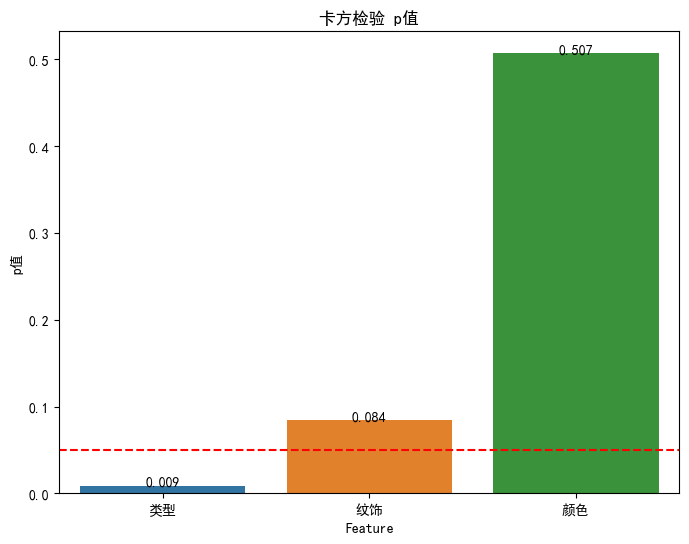

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
p_values = [0.009,0.084,0.507]
p_values_df = pd.DataFrame({
    'Feature': ['类型', '纹饰', '颜色'],
    'p_value': p_values
})
# 创建图形
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Feature', y='p_value', data=p_values_df)

# 在条形顶部添加 p 值
for i in range(p_values_df.shape[0]):
    bar_plot.text(i, p_values_df.p_value[i], round(p_values_df.p_value[i], 3), ha='center')

# 添加 p=0.05 的参考线
plt.axhline(y=0.05, color='r', linestyle='--')

# 设置标题和标签
plt.title('卡方检验 p值')
plt.ylabel('p值')

# 显示图形
plt.show()
